### EHR Price Prediction project ###

#### Objective of the Project
The primary objective of this project is to develop a predictive machine learning model that estimates the price of Electronic Health Record (EHR) software based on customer preferences and system requirements. The model aims to assist healthcare providers and vendors in understanding pricing dynamics and optimizing budget allocation.

#### Problem Statement
EHR software pricing is influenced by multiple factors, including deployment type, number of users, feature customization, integration requirements, security, compliance costs, and additional fees. The complexity of pricing makes it difficult for potential buyers to estimate costs accurately. A predictive pricing model will help stakeholders make informed decisions by providing accurate price estimates based on selected preferences.

#### Solution
This project utilized two machine learning techniques (Random Forest and Gradient Boosting) to build a predictive model that estimated the total price of EHR software based on input features such as deployment type, number of users, customization level, integration needs, and associated costs. The model was trained on historical pricing data and provided reliable price predictions for new customer inquiries.

#### Dataset Description
The dataset consists of 50 entries with 13 features, including categorical and numerical variables. Key attributes in the dataset include:

Pricing Model: Type of licensing (e.g., Subscription, Perpetual License). 

Deployment Type: Whether the software is cloud-based or on-premise.

Number of Users: Number of users expected to use the software.

Features & Customization: Level of customization (Basic, Advanced, Customized).

Integration Requirements: Level of system integration needed (Standard, Full Interoperability).

Training Cost: Cost associated with training users.

Security & Compliance Cost: Expenses related to regulatory compliance and data security.

Support & Maintenance: Ongoing support and maintenance costs.

Scalability Cost: Expenses for scaling up the software.

Contract Fees: Additional contract-based charges.

Department Selected: The department or specialization using the software (e.g., Ophthalmology, ENT, Oral Surgery).

Financial Management System: Type of financial management module integrated (Simple, Advanced).

Total Price (Target Variable): The final price of the EHR software.

##### Loading Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Viewing my dataset

In [5]:
ehr = pd.read_csv("ehr_pricing_dataset.csv")
ehr.head()

,Pricing Model,Deployment Type,Number of Users,Features & Customization,Integration Requirements,Training Cost,Security & Compliance Cost,Support & Maintenance,Scalability Cost,Contract Fees,Department Selected,Financial Management System,Total Price
0,Perpetual License,On-premise,83,Basic,Standard,595,793,1227,352,1614,HIS-PACs Basic,Advanced,21767
1,Perpetual License,Cloud-based,99,Advanced,Full Interoperability,881,2135,1599,2155,647,Ophthalmology,Advanced,29195
2,Perpetual License,Cloud-based,68,Customized,Full Interoperability,1361,1781,1717,1842,865,ENT,Simple,26568
3,Perpetual License,Cloud-based,67,Customized,Standard,312,2508,1139,1894,1621,Ophthalmology,Simple,22880
4,Subscription,Cloud-based,100,Customized,Full Interoperability,654,1110,823,2233,714,Oral Surgery,Simple,23746


#### Checking my columns

In [7]:
ehr.columns

Index(['Pricing Model', 'Deployment Type', 'Number of Users',
       'Features & Customization', 'Integration Requirements', 'Training Cost',
       'Security & Compliance Cost', 'Support & Maintenance',
       'Scalability Cost', 'Contract Fees', 'Department Selected',
       'Financial Management System', 'Total Price'],
      dtype='object')

##### Renaming my columns appropriately

In [9]:
#Rename Columns
ehr.rename(columns={'Pricing Model': 'Pricing_Model',
                   'Deployment Type': 'Deployment_Type',
                  'Number of Users': 'Number_of_Users',
                  'Features & Customization': 'Features_&_Customization',
                  'Integration Requirements': 'Integration_Requirements',
                  'Training Cost': 'Training_Cost',
                  'Security & Compliance Cost': 'Security_&_Compliance Cost',
                  'Support & Maintenance': 'Support_&_Maintenance',
                  'Scalability Cost': 'Scalability_Cost',
                  'Contract Fees': 'Contract_Fees',
                  'Department Selected': 'Department_Selected',
                  'Financial Management System': 'Financial_Management_System',
                  'Total Price': 'Total_Price'},
          inplace=True, errors='raise')

In [11]:
ehr.head(5)

,Pricing_Model,Deployment_Type,Number_of_Users,Features_&_Customization,Integration_Requirements,Training_Cost,Security_&_Compliance Cost,Support_&_Maintenance,Scalability_Cost,Contract_Fees,Department_Selected,Financial_Management_System,Total_Price
0,Perpetual License,On-premise,83,Basic,Standard,595,793,1227,352,1614,HIS-PACs Basic,Advanced,21767
1,Perpetual License,Cloud-based,99,Advanced,Full Interoperability,881,2135,1599,2155,647,Ophthalmology,Advanced,29195
2,Perpetual License,Cloud-based,68,Customized,Full Interoperability,1361,1781,1717,1842,865,ENT,Simple,26568
3,Perpetual License,Cloud-based,67,Customized,Standard,312,2508,1139,1894,1621,Ophthalmology,Simple,22880
4,Subscription,Cloud-based,100,Customized,Full Interoperability,654,1110,823,2233,714,Oral Surgery,Simple,23746


##### Checking if there are missing values

In [13]:
ehr.isnull().sum().sort_values(ascending=False)

Pricing_Model                  0
Deployment_Type                0
Number_of_Users                0
Features_&_Customization       0
Integration_Requirements       0
Training_Cost                  0
Security_&_Compliance Cost     0
Support_&_Maintenance          0
Scalability_Cost               0
Contract_Fees                  0
Department_Selected            0
Financial_Management_System    0
Total_Price                    0
dtype: int64

##### checking for object and numerical columns for transformation

In [15]:
ehr.select_dtypes("number").columns

Index(['Number_of_Users', 'Training_Cost', 'Security_&_Compliance Cost',
       'Support_&_Maintenance', 'Scalability_Cost', 'Contract_Fees',
       'Total_Price'],
      dtype='object')

In [17]:
ehr.select_dtypes("object").columns

Index(['Pricing_Model', 'Deployment_Type', 'Features_&_Customization',
       'Integration_Requirements', 'Department_Selected',
       'Financial_Management_System'],
      dtype='object')

In [19]:
selected_columns = ['Pricing_Model', 'Deployment_Type', 'Features_&_Customization',
       'Integration_Requirements', 'Department_Selected',
       'Financial_Management_System']

In [21]:
ehr_selected = ehr[selected_columns]
ehr_selected.head()

,Pricing_Model,Deployment_Type,Features_&_Customization,Integration_Requirements,Department_Selected,Financial_Management_System
0,Perpetual License,On-premise,Basic,Standard,HIS-PACs Basic,Advanced
1,Perpetual License,Cloud-based,Advanced,Full Interoperability,Ophthalmology,Advanced
2,Perpetual License,Cloud-based,Customized,Full Interoperability,ENT,Simple
3,Perpetual License,Cloud-based,Customized,Standard,Ophthalmology,Simple
4,Subscription,Cloud-based,Customized,Full Interoperability,Oral Surgery,Simple


##### Importing ML Libraries for modeling 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### Transforming non numerical columns to numerical for fitting

In [25]:
# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in ehr_selected:
    le = LabelEncoder()
    ehr[col] = le.fit_transform(ehr_selected[col])
    label_encoders[col] = le  # Store encoders if needed for decoding later

ehr_selected.head()

,Pricing_Model,Deployment_Type,Features_&_Customization,Integration_Requirements,Department_Selected,Financial_Management_System
0,Perpetual License,On-premise,Basic,Standard,HIS-PACs Basic,Advanced
1,Perpetual License,Cloud-based,Advanced,Full Interoperability,Ophthalmology,Advanced
2,Perpetual License,Cloud-based,Customized,Full Interoperability,ENT,Simple
3,Perpetual License,Cloud-based,Customized,Standard,Ophthalmology,Simple
4,Subscription,Cloud-based,Customized,Full Interoperability,Oral Surgery,Simple


In [26]:
ehr.head()

,Pricing_Model,Deployment_Type,Number_of_Users,Features_&_Customization,Integration_Requirements,Training_Cost,Security_&_Compliance Cost,Support_&_Maintenance,Scalability_Cost,Contract_Fees,Department_Selected,Financial_Management_System,Total_Price
0,1,1,83,1,2,595,793,1227,352,1614,4,0,21767
1,1,0,99,0,0,881,2135,1599,2155,647,8,0,29195
2,1,0,68,2,0,1361,1781,1717,1842,865,2,1,26568
3,1,0,67,2,2,312,2508,1139,1894,1621,8,1,22880
4,2,0,100,2,0,654,1110,823,2233,714,9,1,23746


In [27]:
ehr.columns

Index(['Pricing_Model', 'Deployment_Type', 'Number_of_Users',
       'Features_&_Customization', 'Integration_Requirements', 'Training_Cost',
       'Security_&_Compliance Cost', 'Support_&_Maintenance',
       'Scalability_Cost', 'Contract_Fees', 'Department_Selected',
       'Financial_Management_System', 'Total_Price'],
      dtype='object')

In [28]:
# Prepare features and target
X = ehr[['Pricing_Model', 'Deployment_Type', 'Number_of_Users',
       'Features_&_Customization', 'Integration_Requirements', 'Training_Cost',
       'Security_&_Compliance Cost', 'Support_&_Maintenance',
       'Scalability_Cost', 'Contract_Fees', 'Department_Selected',
       'Financial_Management_System']]
y = ehr['Total_Price']

In [86]:
X.head()

,Pricing_Model,Deployment_Type,Number_of_Users,Features_&_Customization,Integration_Requirements,Training_Cost,Security_&_Compliance Cost,Support_&_Maintenance,Scalability_Cost,Contract_Fees,Department_Selected,Financial_Management_System
0,1,1,83,1,2,595,793,1227,352,1614,4,0
1,1,0,99,0,0,881,2135,1599,2155,647,8,0
2,1,0,68,2,0,1361,1781,1717,1842,865,2,1
3,1,0,67,2,2,312,2508,1139,1894,1621,8,1
4,2,0,100,2,0,654,1110,823,2233,714,9,1


In [36]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Print the number of samples in each set
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 40 samples
Testing set size: 10 samples


##### Model Training


Random Forest Model
Training Accuracy: 90.27%
Testing Accuracy: -96.32%


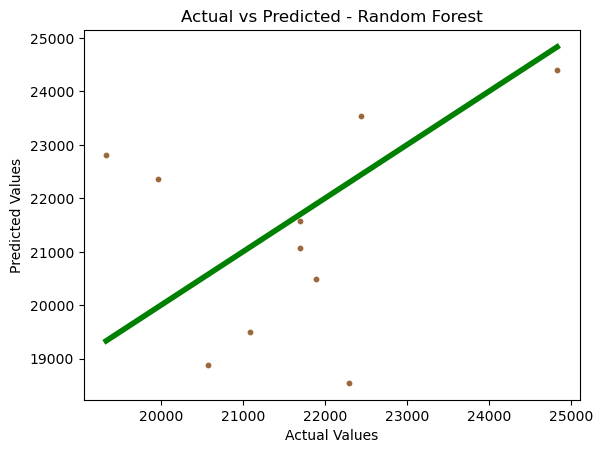

In [40]:
# Train and evaluate Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Compute metrics
accuracy_train_rf = rf_model.score(X_train, y_train) * 100
accuracy_test_rf = rf_model.score(X_test, y_test) * 100
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print accuracy
print(f"\nRandom Forest Model")
print(f"Training Accuracy: {accuracy_train_rf:.2f}%")
print(f"Testing Accuracy: {accuracy_test_rf:.2f}%")

# Scatter plot for actual vs predicted
plt.scatter(y_test, y_pred_rf, s=10, color='#9B673C')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="green", linewidth=4)
plt.title("Actual vs Predicted - Random Forest")
plt.show()

##### Saving models

In [42]:
import joblib

In [44]:
joblib.dump(rf_model, 'random_forest_model.pkl')
print(f"{rf_model} model saved successfully.")

RandomForestRegressor(random_state=42) model saved successfully.



Gradient Boosting Model
Training Accuracy: 100.00%
Testing Accuracy: -226.11%


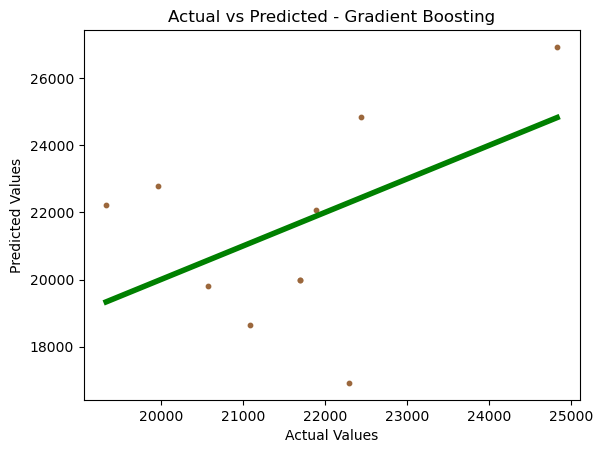

In [55]:
# Train and evaluate Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Compute metrics
accuracy_train_gb = gb_model.score(X_train, y_train) * 100
accuracy_test_gb = gb_model.score(X_test, y_test) * 100
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print accuracy
print(f"\nGradient Boosting Model")
print(f"Training Accuracy: {accuracy_train_gb:.2f}%")
print(f"Testing Accuracy: {accuracy_test_gb:.2f}%")


# Scatter plot for actual vs predicted
plt.scatter(y_test, y_pred_gb, s=10, color='#9B673C')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="green", linewidth=4)
plt.title("Actual vs Predicted - Gradient Boosting")
plt.show()

In [57]:
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print(f"{gb_model} model saved successfully.")

GradientBoostingRegressor(random_state=42) model saved successfully.


##### Loading models for prediction

In [59]:
# Load Random Forest Model
rf_model_loaded = joblib.load("random_forest_model.pkl")
gb_model_loaded = joblib.load("gradient_boosting_model.pkl")
print("Models loaded successfully using joblib!")

Models loaded successfully using joblib!


In [61]:
y_pred_rf = rf_model_loaded.predict(X_test)
y_pred_gb = gb_model_loaded.predict(X_test)
print("Predictions completed!")

Predictions completed!


In [63]:
predictions_df = pd.DataFrame({
    "Actual Values": y_test.values,
    "Random Forest Predictions": y_pred_rf,
    "Gradient Boosting Predictions": y_pred_gb
    })

# Display the first 10 predictions
print(predictions_df.head(10))

   Actual Values  Random Forest Predictions  Gradient Boosting Predictions
0          22299                   18548.15                   16918.015149
1          19335                   22808.60                   22234.579297
2          19967                   22360.33                   22783.958860
3          21089                   19509.09                   18634.559064
4          21891                   20486.12                   22084.895578
5          20571                   18883.71                   19813.582553
6          21692                   21581.35                   19995.540506
7          21697                   21065.64                   19979.972090
8          22446                   23533.01                   24860.470443
9          24831                   24407.89                   26937.455531


Random Forest is better but needs more inputs(rows of data) to learn and make better prediction